<a href="https://colab.research.google.com/github/Naomi0601/Simulacion/blob/main/Inventario_SimPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpy  #mandar a llamar la libreria simpy
import simpy
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def warehouse_run(env, order_cutoff, order_target): #Clase env:es un objeto que se simulara, order_cutff:Valor numerico para realizar inventario, order_tarjet: valor numerico cantidades
  global inventory, balance, num_ordered

  inventory= order_target
  balance=0.0
  num_ordered=0

  while True:
    interarrival = generate_interarrival()
    yield env.timeout(interarrival) #funcion eneradora de valores de manera eficiente
    balance -= inventory*2*interarrival
    demand = generate_demand()
    if demand < inventory:
      balance += 100*demand
      inventory -= demand
      print('{:.2f} sold {}'.format(env.now, demand)) #imprimir en formato de cadena
    else:
      balance += 100*inventory
      inventory = 0
      print('{:.2f} sold {} (out of stock)'.format(env.now, inventory))
    if inventory < order_cutoff and num_ordered == 0:
      env.process(handle_order(env, order_target))


In [ ]:
def handle_order(env, order_target):
  global inventory, balance, num_ordered


  num_ordered = order_target - inventory
  print('{:.2f} placed order for {}'.format(env.now, num_ordered))
  balance -= 50*num_ordered
  yield env.timeout(2.0)
  inventory += num_ordered
  num_ordered=0
  print('{:.2f} received order, {} in inventory'.format(env.now, inventory))

In [ ]:
def generate_interarrival(): #devuelve un valor generado aleatorios
  return np.random.exponential(1./5) #genera numeros aleatorios con distribucion exponencial

In [ ]:
def generate_demand(): #devuelve numeros entero aleatorio
  return np.random.randint(1,5) #genera numeros aleatorios en el rango de 1 a 4

In [ ]:
obs_time=[] #definir listas
inventory_level=[]

In [ ]:
def observe(env): #realizar observaiones periodicamente
  global inventory #indica las variables

  while True:
    obs_time.append(env.now)
    inventory_level.append(inventory)
    yield env.timeout(0.1) # pausa la ejecucion de la funcion generadora y devuelve el control al entorno simulado

In [ ]:
np.random.seed(1) #numeros aleatorios

env = simpy.Environment() #crea un objeto
env.process(warehouse_run(env, 25, 50)) #se crea un proceso en el entorno de lo simulado
env.process(observe(env))

env.run(until=5.0) #se inicia la ejecucion hast el alcance 5

0.11 sold 1
0.65 sold 2
0.72 sold 4
0.77 sold 2
0.81 sold 2
1.04 sold 2
1.19 sold 3
1.27 sold 1
1.31 sold 3
1.36 sold 3
1.59 sold 4
1.59 placed order for 27
1.71 sold 2
1.74 sold 1
2.04 sold 2
2.73 sold 4
2.75 sold 2
3.17 sold 1
3.52 sold 1
3.53 sold 4
3.54 sold 1
3.56 sold 4
3.59 received order, 28 in inventory
3.78 sold 2
3.94 sold 1
4.00 sold 4
4.00 placed order for 29
4.24 sold 1
4.34 sold 4
4.62 sold 4
4.84 sold 2
4.90 sold 4
4.95 sold 2


Text(0, 0.5, 'Simulation level')

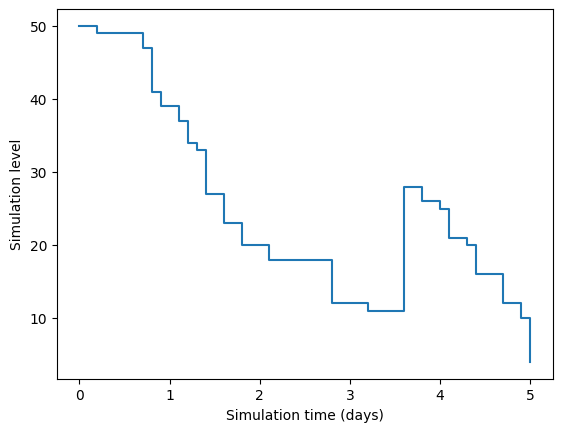

In [ ]:
import matplotlib.pyplot as plt
plt.figure() #crea una figura de grafica vacia
plt.step(obs_time, inventory_level, where='post') #trazala grafica de lineas con los parametros
plt.xlabel('Simulation time (days)') #un titulo en el eje de x
plt.ylabel('Simulation level') #titulo en el eje de las y